# Deck of Cards

## Data Generation

In [1]:
import random
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt
from matplotlib import pyplot

sample_size=30000
my_seed = 12343
random.seed(my_seed)
sets = ["s","h","d","c"]
cards = ['A','2','3','4','5','6','7','8','9','10','J','Q','K']
cardValues = [1,2,3,4,5,6,7,8,9,10,10,10,10]
def get_deck():
    deck_=[]
    for set_ in sets:
        for cardInd in range(13):
            deck_.append({
                "set":set_,
                "card":cards[cardInd],
                "cardValue":cardValues[cardInd]
            })
    random.shuffle(deck_)
    return deck_

In [2]:
def choose_a_card(deck):
    return deck[random.randint(0,len(deck)-1)]

def get_values(data):
    values = []
    for sample in data:
        values.append(sample["cardValue"])
    return values
def draw_a_card(deck_):
    card = deck_[random.randint(0,len(deck_)-1)]
    deck_.remove(card)
    return card

def multiple_draw(deck_,consequtive_draw_size):
    result = []
    for sample in range(sample_size):
        card_sum = 0
        deck_copy = deck_[:]
        for sample1 in range(consequtive_draw_size):
            card = draw_a_card(deck_copy)
            card_sum += card["cardValue"]
        # normalize values by number of draws so that we will be able to compare them
        result.append(card_sum/consequtive_draw_size)
    return result

In [3]:
def show_stats(data):
    stts = stats.describe(data)
    median = np.median(np.array(data))
    std = math.sqrt(stts.variance)
    first = np.percentile(data, 25)
    second = median
    third = np.percentile(data, 75)
    print("Mean: "+str(stts.mean))
    print("Median: "+str(median))
    print("Variance: "+str(stts.variance))
    print("STD: "+str(std))
    print("IQR:"+str(third-first))
    print("1st Quartile:"+str(first))
    print("3rd Quartile:"+str(third))
    print("Range:"+str(stts.minmax))

In [4]:
deck = get_deck()
choose_a_card(deck)

{'card': '3', 'cardValue': 3, 'set': 's'}

### Part 1

First, create a histogram depicting the relative frequencies of the card values for a single draw. Report the mean, median, and standard deviation of the value distribution. (You should have performed this step in the Distribution of Card Values section.)



In [5]:
single_draw_data = multiple_draw(deck,1)

In above tests, cards are drew 30000 times each time with a fresh start. 

Results from above show that our statistics are as below:

In [6]:
show_stats(single_draw_data)

Mean: 6.5226
Median: 7.0
Variance: 9.9594878896
STD: 3.15586563237
IQR:6.0
1st Quartile:4.0
3rd Quartile:10.0
Range:(1, 10)


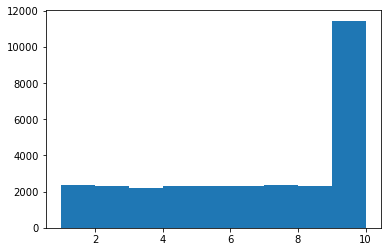

In [7]:

bins = [1,2,3,4,5,6,7,8,9,10]
np.histogram(single_draw_data,bins)
plt.hist(single_draw_data,bins=bins)
plt.show()

### Part 2

Take a look at the distribution of the three-card sums from the samples that you obtained, either from Generate Data, or from your own collection. Report descriptive statistics for the samples you have drawn. Include at least two measures of central tendency and two measures of variability.


In [8]:
three_card_data = multiple_draw(deck,3)

In [9]:
show_stats(three_card_data)

Mean: 6.23326666667
Median: 6.0
Variance: 3.28209606542
STD: 1.81165561447
IQR:2.0
1st Quartile:5.0
3rd Quartile:7.0
Range:(1, 10)


### Part 3
Create a histogram of the sampled three-card sums. Compare its shape to that of the original distribution. How are they different, and can you explain why this is the case?

3-Card Draw stats
Mean: 6.23326666667
Median: 6.0
Variance: 3.28209606542
STD: 1.81165561447
IQR:2.0
1st Quartile:5.0
3rd Quartile:7.0
Range:(1, 10)


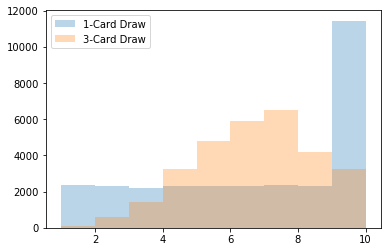

In [10]:
print('3-Card Draw stats')
show_stats(three_card_data)
pyplot.hist(single_draw_data, bins, alpha=0.3, label='1-Card Draw')
pyplot.hist(three_card_data, bins, alpha=0.3, label='3-Card Draw')
pyplot.legend(loc='upper left')
pyplot.show()

Above figure shows both histogram concurrently. The histograms seem to be different in terms of centrality. When we go from single draw to multiple draws without replacing we see that average score approaches to the central value. Note that to make three-draw test comparable to a single-draw test, we combined triple draws and normalized total value by number of draws, which is 3 in this case. 

### Part 4
Make some estimates about values you would get on future draws. Within what range will you expect approximately 90% of your draw values to fall? What is the approximate probability that you will get a draw value of at least 20? Make sure you justify how you obtained your values.

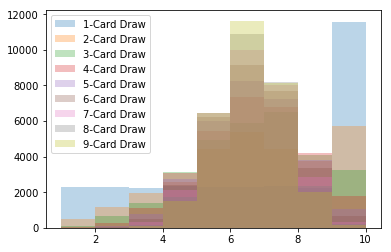

In [11]:
for draw in range(1,10):
    pyplot.hist(multiple_draw(deck,draw), bins, alpha=0.3, label=str(draw)+'-Card Draw')
pyplot.legend(loc='upper left')
pyplot.show()
#np.histogram(data_values_triplets,range(3,30))
#plt.hist(data_values_triplets,bins=range(3,30))
#plt.show()

Above data graphs shows historgrams for varying number of consequtive draws. It clearly shows histograms become more and more central. The reason for this is when we draw cards consequtively, the possibility of selecting samples having highest number of instances decreases while average values near center increases. This leads to having more central result.